In [261]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [262]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [263]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [264]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [265]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report

In [267]:
my_data = pd.read_csv("/Users/mac/Library/CloudStorage/OneDrive-TeessideUniversity/MACHINE LEARNING/ICA/Seattle-weather.csv")
print(my_data) #Here we import and view our dataset
#/Users/mac/Library/CloudStorage/OneDrive-TeessideUniversity/MACHINE LEARNING/ICA/Seattle-weather.csv
#C:/Users/d3663842/OneDrive - Teesside University/MACHINE LEARNING/ICA/Seattle-weather.csv

            date  precipitation  temp_max  temp_min  wind  weather
0     01/01/2012            0.0      12.8       5.0   4.7  drizzle
1     02/01/2012           10.9      10.6       2.8   4.5     rain
2     03/01/2012            0.8      11.7       7.2   2.3     rain
3     04/01/2012           20.3      12.2       5.6   4.7     rain
4     05/01/2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  27/12/2015            8.6       4.4       1.7   2.9     rain
1457  28/12/2015            1.5       5.0       1.7   1.3     rain
1458  29/12/2015            0.0       7.2       0.6   2.6      fog
1459  30/12/2015            0.0       5.6      -1.0   3.4      sun
1460  31/12/2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [268]:
pd.isnull(my_data) ##This returns true if a null value is found and false if otherwise

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [269]:
my_data.isna().sum() #This gives a summary of the number of null values in the dataset

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [270]:
my_data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

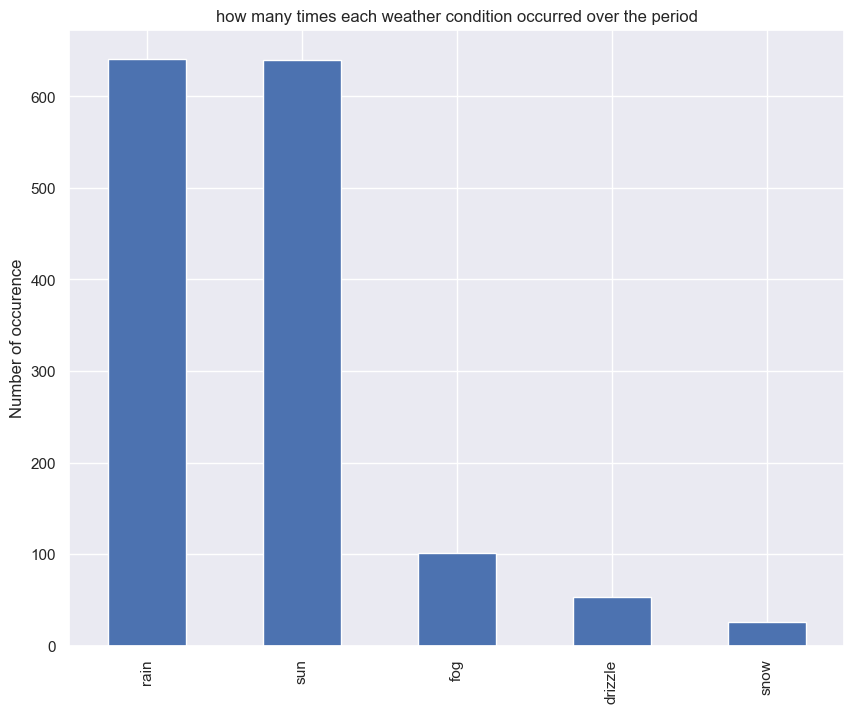

In [271]:
occurence = my_data['weather'].value_counts()[:10] #visualizing how the different weather conditions occurred over time
occurence.plot(kind='bar',figsize=(10,8))
plt.title('how many times each weather condition occurred over the period')
plt.ylabel('Number of occurence')
plt.show()

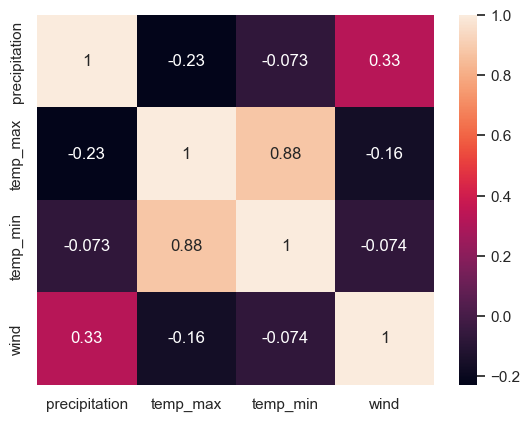

In [272]:
heatmap = my_data.corr()  # Compute correlation matrix
sns.heatmap(heatmap, annot=True)  # Plot heatmap with annotations
plt.show()  # Show the plot

<Figure size 1300x1700 with 0 Axes>

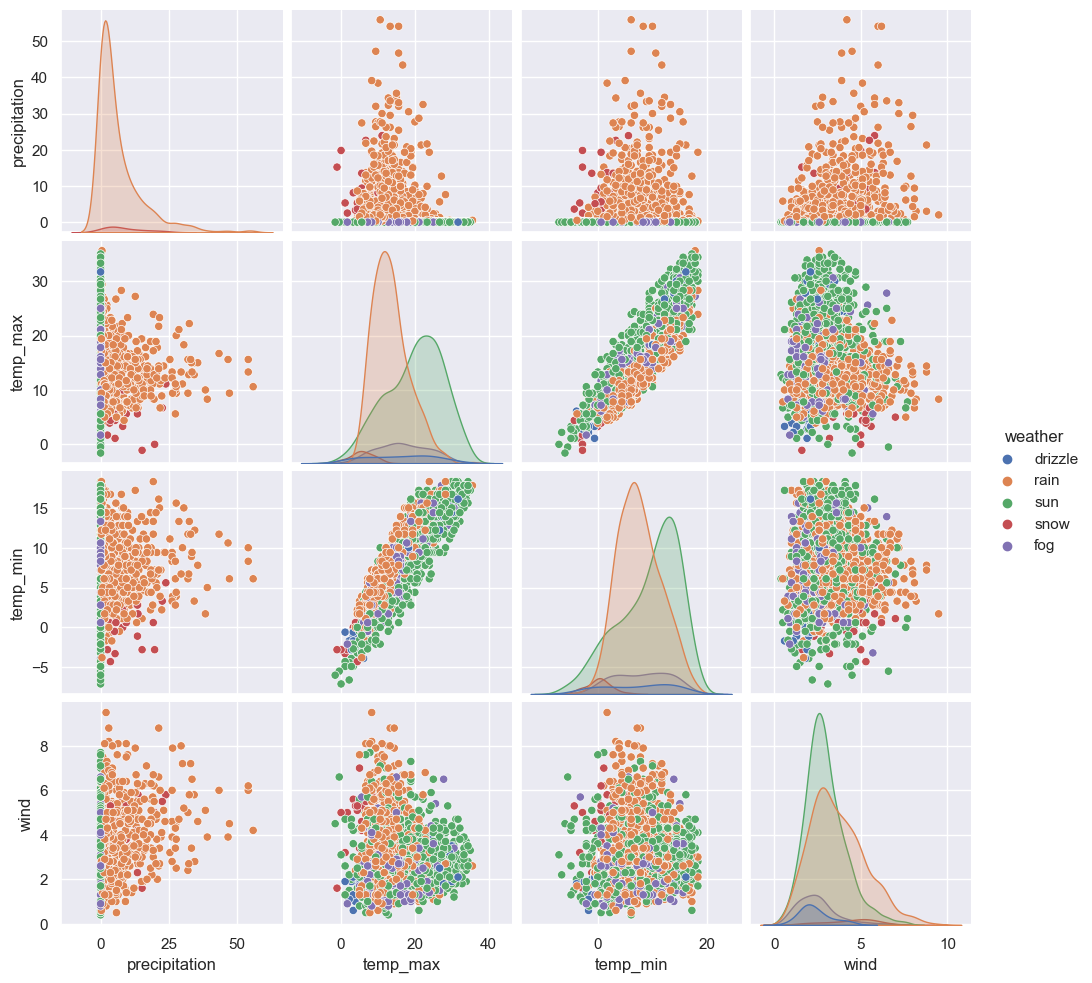

In [273]:
plt.figure(figsize=(13,17)) #pairplot to compare the correlation and relationship between features
sns.pairplot(data = my_data, hue='weather')
plt.show()

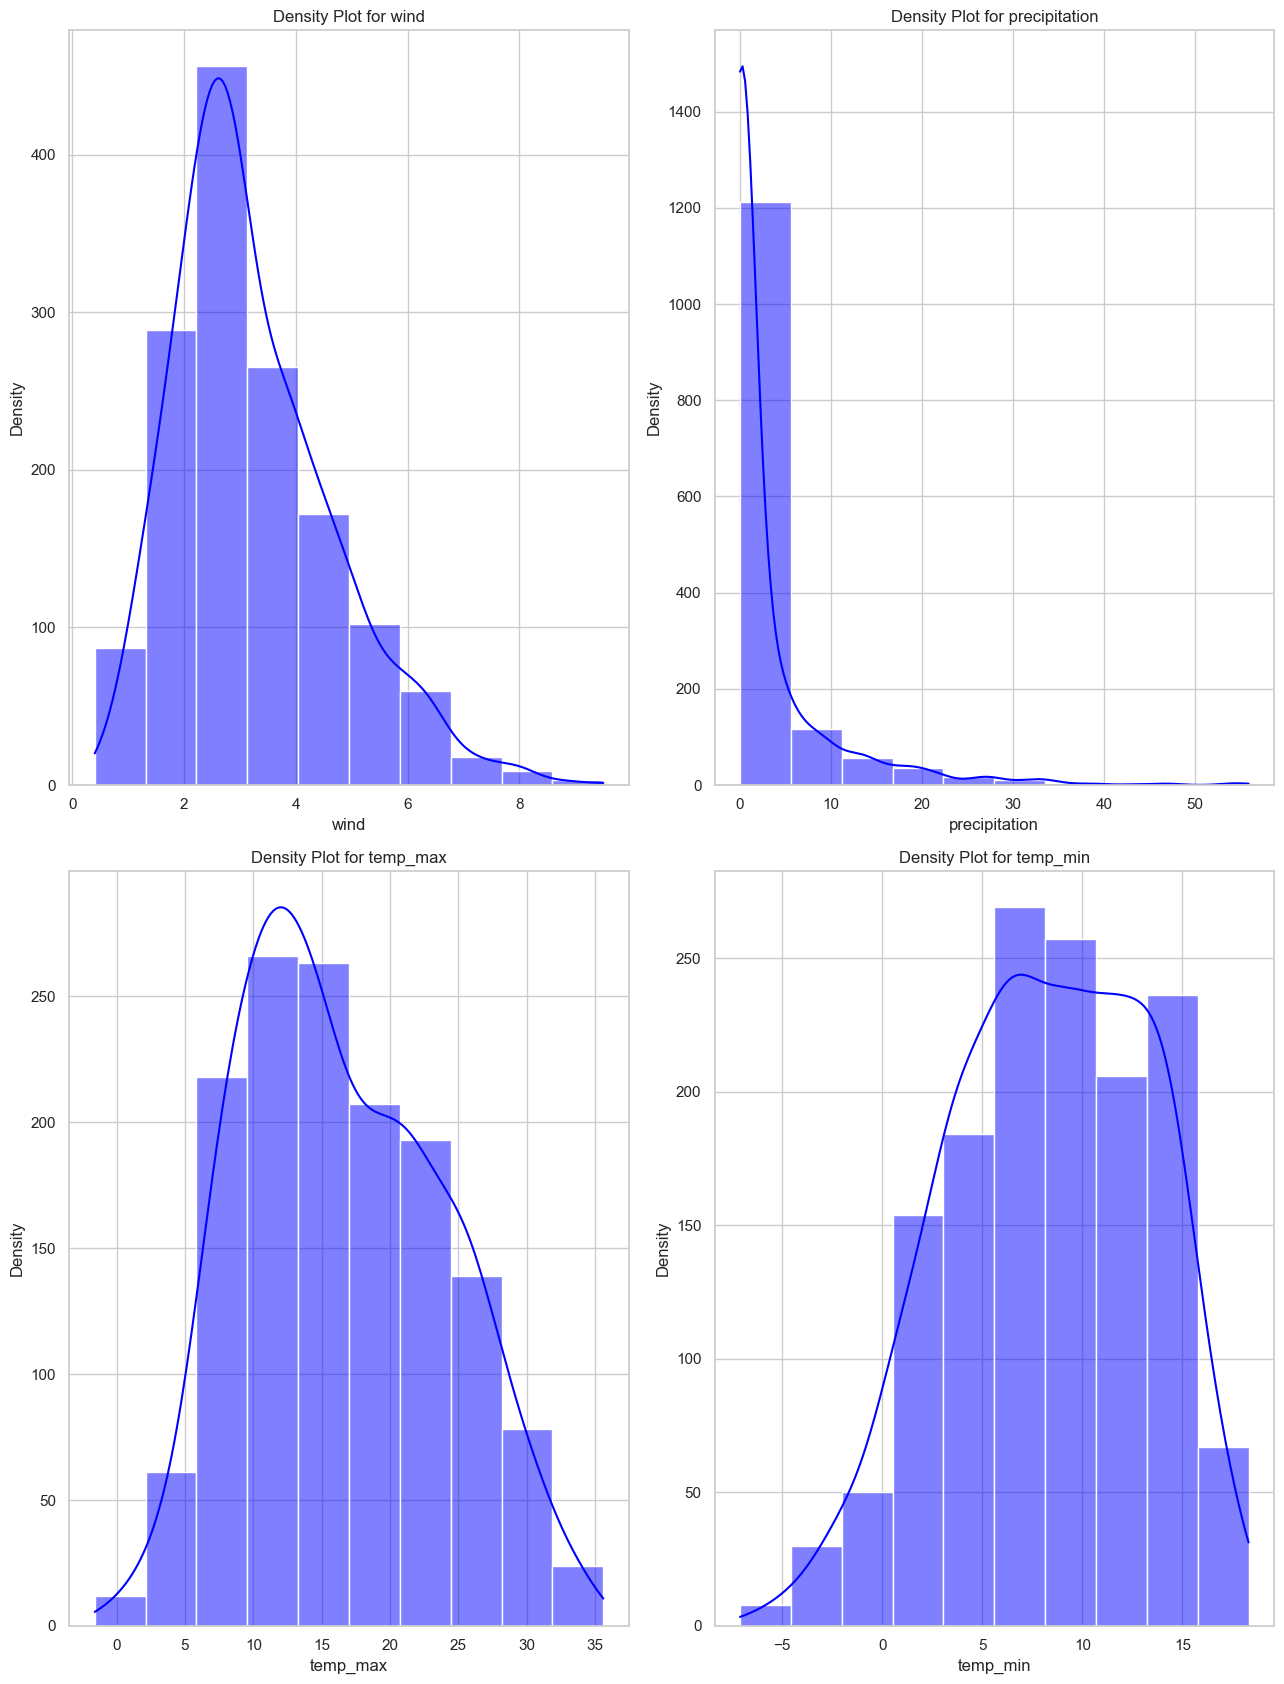

In [274]:
data = my_data
numeric = ['wind', 'precipitation', 'temp_max', 'temp_min']
sns.set(style="whitegrid")
plt.figure(figsize=(13,17))
for i, var in enumerate(numeric, 1):
 plt.subplot(2, 2, i)
 sns.histplot(data[var], kde=True, color='blue', bins=10)
 plt.title(f'Density Plot for {var}')
 plt.xlabel(var)
 plt.ylabel('Density')

plt.tight_layout()
plt.show()  

In [275]:
from sklearn.preprocessing import MinMaxScaler
def dataset_minmax(my_data): #finding the minimum and maximum values for each column
    minmax = list()
    for i in range(len(my_data[0])):
        col_values = [row[i] for row in my_data]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
        return minmax

In [276]:
from sklearn.preprocessing import MinMaxScaler #Normalizing the data
scaler = MinMaxScaler() 
data_scaled = (scaler.fit_transform(my_data[numeric]))
print(data_scaled)

[[0.47252747 0.         0.38709677 0.47637795]
 [0.45054945 0.19499106 0.32795699 0.38976378]
 [0.20879121 0.01431127 0.35752688 0.56299213]
 ...
 [0.24175824 0.         0.23655914 0.30314961]
 [0.32967033 0.         0.19354839 0.24015748]
 [0.34065934 0.         0.19354839 0.19685039]]


In [277]:
def cross_validation_split(my_data, n_folds): #split the data into n-folds
    my_data_split = list()
    my_data_copy = list(my_data)
    fold_size = int(len(my_data) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(my_data_copy))
            fold.append(my_data_copy.pop(index))
            my_data_split.append(fold)
            return my_data_split



In [278]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
            return correct / float(len(actual)) * 100.0

In [279]:
from sklearn.model_selection import train_test_split #Split the dataset for training and testing using a 60-30 ratio
Y = my_data['weather']
X = my_data.drop(columns=['weather', 'date'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (1022, 4)
Y train shape:  (1022,)
X test shape:  (439, 4)
Y test shape:  (439,)


# K-Nearest Neighbour

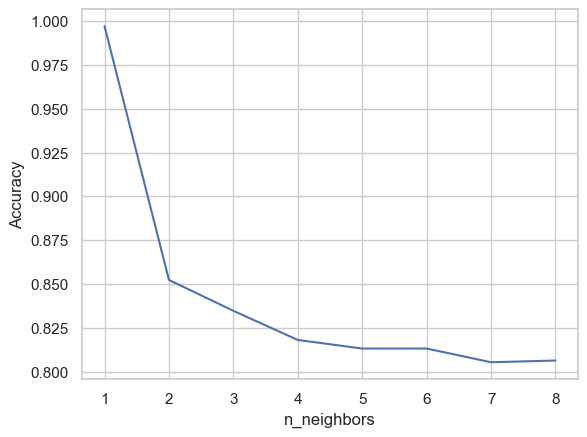

In [280]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = np.arange(1, 9) #plotting to find the n_neighbors
train_accuracy = np.empty(len(neighbors)) 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
    train_accuracy[i] = knn.score(X_train, Y_train) 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  

plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [281]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [282]:
from sklearn.neighbors import KNeighborsClassifier #apply KNN on the test and train data with n=1
knnclassifier = KNeighborsClassifier(n_neighbors=1)

In [283]:
from sklearn.model_selection import GridSearchCV #using Grid search for hyper-parameter tuning
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'minkowski']
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# create a parameter grid to map the parameter names to the values that should be searched using Grid search
param_grid = dict(n_neighbors=number, weights=weight_options, metric=metric_options)
#param_grid = dict(n_neighbors=number)
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False) 
grid.fit(X_train, Y_train)
print(grid.best_score_)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'minkowski']}
0.7563011612411955
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


,mean_test_score,std_test_score,params
0,0.711289,0.039655,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
1,0.711289,0.039655,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
2,0.666324,0.034778,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
3,0.711289,0.039655,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
4,0.721083,0.038843,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
5,0.725976,0.032004,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
6,0.728898,0.028955,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei..."
7,0.736741,0.034421,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei..."
8,0.746507,0.035849,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."
9,0.745517,0.035551,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."


In [284]:
knn_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 7, weights = 'distance') 
knn_model.fit(X_train, Y_train) #Applying KNN algorithm to the data 

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [285]:
y_pred = knn_model.predict(X_test)

In [286]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test, y_pred) #printing the accuracy score

0.7608200455580866

In [287]:
confusion_matrix(Y_test, y_pred) #printing confusion matrix to check for data balance and distribution

array([[  1,   1,   0,   0,  12],
       [  1,   1,   2,   0,  28],
       [  1,   0, 164,   0,  27],
       [  0,   1,   4,   0,   3],
       [  3,   9,  13,   0, 168]])

In [288]:
print(Y_train.value_counts())

rain       449
sun        447
fog         69
drizzle     39
snow        18
Name: weather, dtype: int64


In [289]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
kf = StratifiedKFold(n_splits=7, shuffle=False)

In [290]:
%pip install imblearn


Note: you may need to restart the kernel to use updated packages.


# Balancing the dataset using SMOTETOMEK

In [291]:
from imblearn.combine import SMOTETomek #importing smote tomek library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [292]:
# Applying Smote Tomek to balance the data
smote_tomek = SMOTETomek()
X_resampled, Y_resampled = smote_tomek.fit_resample(X_train, Y_train)

In [293]:
# Split the resampled data into train and test sets
X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

In [294]:
# performing grid search on the resampled data
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'minkowski']
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=number, weights=weight_options, metric=metric_options)
#param_grid = dict(n_neighbors=number)
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False) 
grid.fit(X_train_resampled, Y_train_resampled)
print(grid.best_score_)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'minkowski']}
0.8520547945205479
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


,mean_test_score,std_test_score,params
0,0.852055,0.024734,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
1,0.852055,0.024734,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
2,0.805479,0.023368,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
3,0.852055,0.024734,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
4,0.806849,0.025774,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
5,0.831507,0.024543,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
6,0.791096,0.025490,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei..."
7,0.838356,0.023766,"{'metric': 'euclidean', 'n_neighbors': 4, 'wei..."
8,0.788356,0.031603,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."
9,0.826027,0.026385,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."


In [295]:
# Applying the knn model on the resampled data using grid search for hyper parameter tuning
knn_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1, weights = 'distance') 
knn_model.fit(X_train_resampled, Y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

In [296]:
y_pred = knn_model.predict(X_test_resampled)

In [297]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test_resampled, y_pred)
print(classification_report(Y_test_resampled, y_pred))

              precision    recall  f1-score   support

     drizzle       0.76      0.93      0.84       107
         fog       0.81      0.89      0.85       137
        rain       0.91      0.80      0.85       127
        snow       0.98      0.99      0.98       130
         sun       0.80      0.64      0.71       126

    accuracy                           0.85       627
   macro avg       0.85      0.85      0.85       627
weighted avg       0.86      0.85      0.85       627



In [298]:
print(Y_test_resampled.value_counts())

fog        137
snow       130
rain       127
sun        126
drizzle    107
Name: weather, dtype: int64


In [299]:
confusion_matrix(Y_test_resampled, y_pred) #confirming that the data is balanced

array([[100,   1,   4,   0,   2],
       [ 10, 122,   2,   0,   3],
       [  3,   4, 102,   3,  15],
       [  0,   0,   1, 129,   0],
       [ 18,  24,   3,   0,  81]])

# Random Forest Classifier

In [300]:

%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [301]:
from sklearn.ensemble import RandomForestClassifier #importing random forest classifier
from sklearn import metrics

In [302]:
#creating a random forest classifier
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(1,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

y_pred_rfc = clf.fit(X_train_resampled, Y_train_resampled)

# Get the best estimator from the grid search
best_rfc = clf.best_estimator_

# Make predictions using the best estimator
y_pred_best_rfc = best_rfc.predict(X_test_resampled)

# Print the best parameters and score
print(clf.best_params_)
print(clf.best_score_)

# Print the classification report using the actual predictions
print(classification_report(Y_test_resampled, y_pred_best_rfc))


{'max_depth': 13, 'max_features': 2}
0.8760273972602739
              precision    recall  f1-score   support

     drizzle       0.74      0.94      0.83       107
         fog       0.82      0.85      0.84       137
        rain       0.97      0.92      0.94       127
        snow       0.98      0.98      0.98       130
         sun       0.82      0.63      0.71       126

    accuracy                           0.86       627
   macro avg       0.86      0.86      0.86       627
weighted avg       0.87      0.86      0.86       627



# GRADIENT BOOSTING CLASSIFIER

In [303]:
#Gradient-Boosting Classifier
%pip install -U scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#creating the gradient boosting classifier

In [304]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)
gbc.fit(X_train_resampled,Y_train_resampled)

# Generate predictions using the fitted model
y_pred_gbc = gbc.predict(X_test_resampled)

print("GBC accuracy is %2.2f" % accuracy_score(Y_test_resampled, y_pred_gbc))
print(classification_report(Y_test_resampled, y_pred_gbc))


GBC accuracy is 0.87
              precision    recall  f1-score   support

     drizzle       0.81      0.85      0.83       107
         fog       0.81      0.82      0.82       137
        rain       0.94      0.93      0.93       127
        snow       0.98      0.98      0.98       130
         sun       0.80      0.75      0.78       126

    accuracy                           0.87       627
   macro avg       0.87      0.87      0.87       627
weighted avg       0.87      0.87      0.87       627



# Naive Bayes Classification

In [305]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [306]:
#creating and evaluating the GNB classifier
gnb = GaussianNB()
y_pred = gnb.fit(X_train_resampled, Y_train_resampled).predict(X_test_resampled)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test_resampled != y_pred).sum()))


Number of mislabeled points out of a total 439 points : 230


In [307]:
from sklearn.metrics import accuracy_score

#We run the model on the train data

# Here we train the model using the resampled training data
gnb.fit(X_train_resampled, Y_train_resampled)

# then proceed to make predictions on the training data
predict_train = gnb.predict(X_train_resampled)

# before evaluating the accuracy on the training data
accuracy_train = accuracy_score(Y_train_resampled, predict_train)
print('accuracy_score on train dataset: ', accuracy_train)


accuracy_score on train dataset:  0.6267123287671232


In [308]:
#we run the model on the test data
# then proceed to make predictions on the training data
# predict the target on the test dataset
predict_test = gnb.predict(X_test_resampled)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(Y_test_resampled,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)
print(classification_report(Y_test_resampled, y_pred))

accuracy_score on test dataset :  0.6331738437001595
              precision    recall  f1-score   support

     drizzle       0.38      0.41      0.40       107
         fog       0.40      0.47      0.43       137
        rain       0.97      0.85      0.91       127
        snow       0.91      0.98      0.94       130
         sun       0.54      0.43      0.48       126

    accuracy                           0.63       627
   macro avg       0.64      0.63      0.63       627
weighted avg       0.65      0.63      0.64       627



In [309]:
# check for overfitting
print('Training score: {0:0.4f}'. format(gnb.score(X_train_resampled, Y_train_resampled)))
print('Testing score: {0:0.4f}'. format(gnb.score(X_test_resampled, Y_test_resampled)))

Training score: 0.6267
Testing score: 0.6332


# SUPPORT VECTOR MACHINE

In [310]:
from sklearn.svm import SVC
svc = SVC() 
svc.fit(X_train_resampled, Y_train_resampled) 
# print prediction results 
predictions = svc.predict(X_test_resampled) 
print(classification_report(Y_test_resampled, predictions))

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_resampled, Y_train_resampled)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_resampled, Y_test_resampled)))

              precision    recall  f1-score   support

     drizzle       0.55      0.25      0.35       107
         fog       0.42      0.79      0.55       137
        rain       0.95      0.72      0.82       127
        snow       0.95      0.95      0.95       130
         sun       0.54      0.40      0.46       126

    accuracy                           0.64       627
   macro avg       0.68      0.62      0.62       627
weighted avg       0.68      0.64      0.63       627

Accuracy on training set: 0.645
Accuracy on test set: 0.638


In [311]:
#apply grid search to find the best parameter combination
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_resampled, Y_train_resampled)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.517 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.476 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.558 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.459 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.668 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.568 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.829 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.812 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.805 total time=   0.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.842 total time=   0.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.842 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.781 total time=   0.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.825 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.2s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.771 total time=   0.2s
[CV 5/5] END ....C=1000, gam

In [312]:
grid_predictions = grid.predict(X_test_resampled) 
  
# print classification report 
print(classification_report(Y_test_resampled, grid_predictions))


              precision    recall  f1-score   support

     drizzle       0.75      0.96      0.84       107
         fog       0.83      0.91      0.86       137
        rain       0.93      0.85      0.89       127
        snow       0.98      0.99      0.98       130
         sun       0.82      0.60      0.69       126

    accuracy                           0.86       627
   macro avg       0.86      0.86      0.85       627
weighted avg       0.86      0.86      0.86       627



In [313]:
#print accuracy score after grid search tuning
print(accuracy_score(Y_test_resampled, grid_predictions)*100)

85.96491228070175


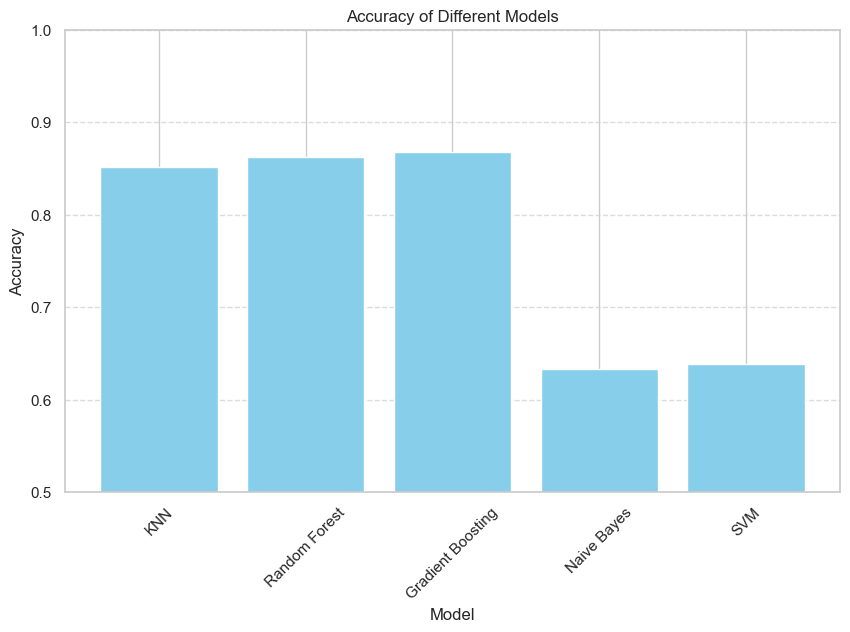

In [314]:
import matplotlib.pyplot as plt

# Calculate accuracy for each model
knn_accuracy = accuracy_score(Y_test_resampled, knn_model.predict(X_test_resampled))
rf_accuracy = accuracy_score(Y_test_resampled, clf.predict(X_test_resampled))
gbc_accuracy = accuracy_score(Y_test_resampled, gbc.predict(X_test_resampled))
gnb_accuracy = accuracy_score(Y_test_resampled, gnb.predict(X_test_resampled))
svm_accuracy = accuracy_score(Y_test_resampled, svc.predict(X_test_resampled))

# Define the models and their corresponding accuracy scores
models = ['KNN', 'Random Forest', 'Gradient Boosting', 'Naive Bayes', 'SVM']
accuracies = [knn_accuracy, rf_accuracy, gbc_accuracy, gnb_accuracy, svm_accuracy]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.5, 1.0)  # Adjust ylim if necessary
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
